<a href="https://colab.research.google.com/github/namratabiswas/Attention_in_Transformers/blob/main/positional_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why** Positional Encoding Matters

Transformer models process input in parallel, not sequentially. Without positional encoding, the model would treat:

"I love you"

"You love I"

…as the same set of words — because the order wouldn’t matter!


**Positional encoding adds information like:**

“This word is in position 1, this is in 2…”
so that the model can tell that "I" is the subject in one and object in another.


**Examples with and without Positional Encoding**

"The cat chased the mouse."	Cat is the one doing the chasing
"The mouse chased the cat."	Mouse is doing the chasing

Without positional encoding, the model sees the same bag of words.

With encoding, it knows:

“cat” is subject in sentence 1

“mouse” is subject in sentence 2

In [1]:
# Positional Encoding - From Scratch
import numpy as np
import torch
import matplotlib.pyplot as plt

def get_positional_encoding(seq_len, d_model):
    """
    Create sinusoidal positional encoding (seq_len x d_model)
    """
    pe = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            div_term = np.power(10000, 2 * i / d_model)
            pe[pos, i] = np.sin(pos / div_term)
            if i + 1 < d_model:
                pe[pos, i + 1] = np.cos(pos / div_term)
    return torch.tensor(pe, dtype=torch.float32)

# Example: 50 positions, 16-dim embeddings
seq_len = 50
d_model = 16
pos_encoding = get_positional_encoding(seq_len, d_model)
print(f"Shape: {pos_encoding.shape}")

Shape: torch.Size([50, 16])


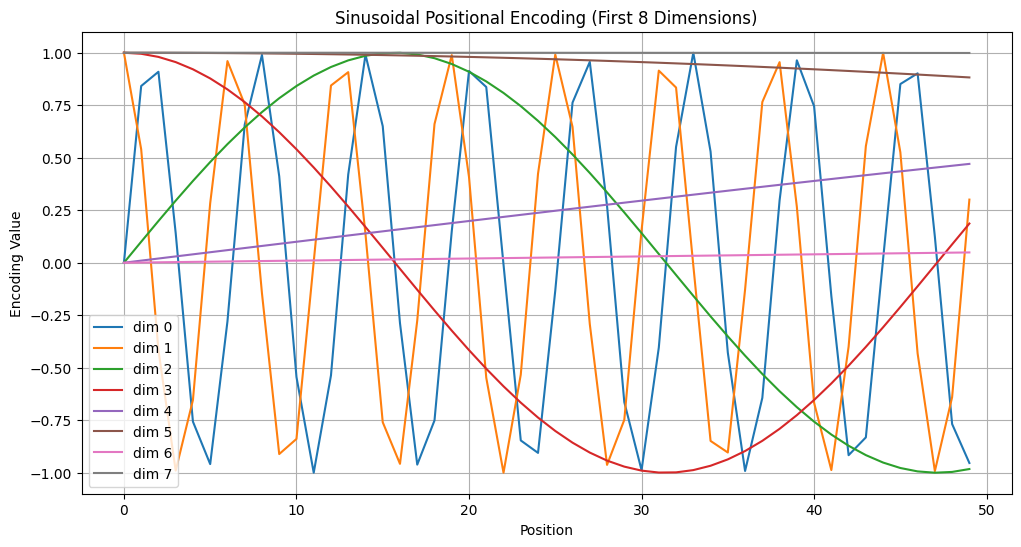

In [2]:
# Visualization
plt.figure(figsize=(12, 6))
for i in range(8):  # Plot first 8 dimensions
    plt.plot(pos_encoding[:, i], label=f"dim {i}")
plt.title("Sinusoidal Positional Encoding (First 8 Dimensions)")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Example: Add to word embeddings
batch_size = 1
seq_len = 10
d_model = 16

# Random word embeddings
word_emb = torch.randn(batch_size, seq_len, d_model)

# Positional encodings
pe = get_positional_encoding(seq_len, d_model).unsqueeze(0)  # Shape: (1, seq_len, d_model)

# Add to embeddings
input_with_pe = word_emb + pe
print("Input shape with positional encoding:", input_with_pe.shape)

Input shape with positional encoding: torch.Size([1, 10, 16])


In [4]:
# Toy embeddings (3 tokens, 4-dim)
tokens = torch.tensor([
    [1.0, 0.5, 0.3, 0.2],  # "I"
    [0.9, 0.6, 0.2, 0.1],  # "love"
    [0.8, 0.4, 0.1, 0.3]   # "you"
])

In [5]:
# Shuffle positions (e.g., "you love I")
tokens_shuffled = tokens[[2, 1, 0]]


In [6]:
# Positional Encoding (sinusoidal)
def get_pos_enc(seq_len, d_model):
    pe = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            angle = pos / np.power(10000, (2 * i) / d_model)
            pe[pos, i] = np.sin(angle)
            if i + 1 < d_model:
                pe[pos, i + 1] = np.cos(angle)
    return torch.tensor(pe, dtype=torch.float32)

pe = get_pos_enc(3, 4)

In [7]:
# Apply positional encoding
tokens_with_pe = tokens + pe
tokens_shuffled_with_pe = tokens_shuffled + pe

print("Original + PE:\n", tokens_with_pe)
print("\nShuffled + PE:\n", tokens_shuffled_with_pe)

Original + PE:
 tensor([[ 1.0000,  1.5000,  0.3000,  1.2000],
        [ 1.7415,  1.1403,  0.2001,  1.1000],
        [ 1.7093, -0.0161,  0.1002,  1.3000]])

Shuffled + PE:
 tensor([[0.8000, 1.4000, 0.1000, 1.3000],
        [1.7415, 1.1403, 0.2001, 1.1000],
        [1.9093, 0.0839, 0.3002, 1.2000]])


Even though the base embeddings are the same, adding position creates different final vectors

These different vectors lead to different attention outputs, changing how the sentence is understood